In [1]:
library(tidyverse)
library(gmodels)

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Reading in the data and initial examination

For the first part of this practical session we will use data from the Whitehall study (whitehall.dta).

To read in the dataset type:

In [2]:
library(haven)

In [3]:
whitehall_df <- read_dta("Data_files-20211113/WHITEHALL.dta")

In [4]:
head(whitehall_df)

id,all,chd,sbp,chol,grade4,smok,agein,grade,cholgrp,sbpgrp,timein,timeout,timebth
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<date>,<date>
5001,0,0,120,273,3,4,47.48255,2,4,2,1967-09-13,1987-01-30,1920-03-20
5019,0,0,118,234,1,3,56.10678,1,3,1,1967-09-13,1987-01-30,1911-08-06
5038,0,0,147,295,2,3,51.44422,1,4,3,1967-09-13,1987-01-30,1916-04-03
5039,0,0,92,210,2,1,51.11567,1,3,1,1967-09-13,1987-01-30,1916-08-02
5042,1,0,128,287,2,2,55.48528,1,4,2,1967-09-13,1983-04-12,1912-03-20
5052,1,0,109,209,2,2,54.43669,1,3,1,1967-09-13,1984-07-10,1913-04-07


### We are going to examine the effect of smoking on mortality from any cause. all is the variable name for all cause mortality

**all**

coded: 1=death from any cause; 0=alive smok is the variable name for smoking category

**smok** 

coded: 1=never smoked; 2=ex-smoker; 3=1-14 cigarettes per day; 4=15-24 cigarettes per day; 5=25+ cigarettes per day

To find out how many deaths from all causes there were, type:

In [5]:
CrossTable(whitehall_df$all)


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  1677 

 
          |         0 |         1 | 
          |-----------|-----------|
          |      1274 |       403 | 
          |     0.760 |     0.240 | 
          |-----------|-----------|



 


There were 403 deaths from all causes (24.03%).

Similarly to see the distribution of the cohort for smoking categories, type:

In [6]:
CrossTable(whitehall_df$smok)


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  1677 

 
          |         1 |         2 |         3 |         4 |         5 | 
          |-----------|-----------|-----------|-----------|-----------|
          |       317 |       646 |       310 |       279 |       125 | 
          |     0.189 |     0.385 |     0.185 |     0.166 |     0.075 | 
          |-----------|-----------|-----------|-----------|-----------|



 


So, there were 317 men who had never smoked, 646 ex-smokers, etc.

To split the cohort into current smokers and non-smokers we must create a new variable that takes the values 0 for never or ex-smokers and 1 for smokers. To do this use the following commands:

In [7]:
whitehall_df_2 <- whitehall_df %>%
    mutate(smok2 = case_when(smok == 1 ~ 0,
                             smok == 2 ~ 0,
                             smok == 3 ~ 1,
                             smok == 4 ~ 1,
                             smok == 5 ~ 1))

In [8]:
head(whitehall_df_2)

id,all,chd,sbp,chol,grade4,smok,agein,grade,cholgrp,sbpgrp,timein,timeout,timebth,smok2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<date>,<date>,<dbl>
5001,0,0,120,273,3,4,47.48255,2,4,2,1967-09-13,1987-01-30,1920-03-20,1
5019,0,0,118,234,1,3,56.10678,1,3,1,1967-09-13,1987-01-30,1911-08-06,1
5038,0,0,147,295,2,3,51.44422,1,4,3,1967-09-13,1987-01-30,1916-04-03,1
5039,0,0,92,210,2,1,51.11567,1,3,1,1967-09-13,1987-01-30,1916-08-02,0
5042,1,0,128,287,2,2,55.48528,1,4,2,1967-09-13,1983-04-12,1912-03-20,0
5052,1,0,109,209,2,2,54.43669,1,3,1,1967-09-13,1984-07-10,1913-04-07,0


It is good practice always to check that the new variable has been coded correctly. We can do this by tabulating it against the old one. 

Type:

In [9]:
CrossTable(whitehall_df_2$smok, whitehall_df_2$smok2)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  1677 

 
                    | whitehall_df_2$smok2 
whitehall_df_2$smok |         0 |         1 | Row Total | 
--------------------|-----------|-----------|-----------|
                  1 |       317 |         0 |       317 | 
                    |   100.068 |   134.966 |           | 
                    |     1.000 |     0.000 |     0.189 | 
                    |     0.329 |     0.000 |           | 
                    |     0.189 |     0.000 |           | 
--------------------|-----------|-----------|-----------|
                  2 |       646 |         0 |       646 | 
                    |   203.925 |   275.041 |           | 
                    |     1.000 |     0.000 |     0.385 | 
                    |     0.671 |     0.000 |      

So those who never smoked and the ex- smokers are coded as 0 in smok2 and anyone who smokes at least one cigarette is coded as 1.

# Calculation of risks and risk ratios

There are 2 ways we can obtain risks, the third also gives risk ratios automatically.

▪ To examine the risk of death according to smoking status we can simply use the
CrossTable command. It is easy to obtain risks using this command. Type:

In [10]:
CrossTable(whitehall_df_2$smok2, whitehall_df_2$all)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  1677 

 
                     | whitehall_df_2$all 
whitehall_df_2$smok2 |         0 |         1 | Row Total | 
---------------------|-----------|-----------|-----------|
                   0 |       795 |       168 |       963 | 
                     |     5.498 |    17.379 |           | 
                     |     0.826 |     0.174 |     0.574 | 
                     |     0.624 |     0.417 |           | 
                     |     0.474 |     0.100 |           | 
---------------------|-----------|-----------|-----------|
                   1 |       479 |       235 |       714 | 
                     |     7.415 |    23.440 |           | 
                     |     0.671 |     0.329 |     0.426 | 
                     |     0.376 |     0.

The row percentages give the risk

Another way to derive the risk of death is to use the summarise command.

In [11]:
whitehall_df_2 %>% 
    group_by(smok2) %>% # our variable of interest
    summarise( # summarise operation by group
        mean = mean(all),
        std = sd(all),
        freq = length(all)
    )

smok2,mean,std,freq
<dbl>,<dbl>,<dbl>,<int>
0,0.1744548,0.3796973,963
1,0.3291317,0.4702273,714


The risk for non-smokers is the same as before = 0.1745 (17.45%)

We can also produce a table of risk measures and effect measures using the epi.2by2 command from epiR specifically designed for risks. Type:

In [12]:
library("epiR")

Loading required package: survival

Package epiR 2.0.39 is loaded

Type help(epi.about) for summary information

Type browseVignettes(package = 'epiR') to learn how to use epiR for applied epidemiological analyses






In [13]:
epi.2by2(table(factor(whitehall_df_2$smok2, levels = c(1,0)), 
               factor(whitehall_df_2$all, levels = c(1,0))), 
         method = "cohort.count", digits=4)

             Outcome +    Outcome -      Total        Inc risk *        Odds
Exposed +          235          479        714              32.9       0.491
Exposed -          168          795        963              17.4       0.211
Total              403         1274       1677              24.0       0.316

Point estimates and 95% CIs:
-------------------------------------------------------------------
Inc risk ratio                                 1.8866 (1.5873, 2.2424)
Odds ratio                                     2.3216 (1.8480, 2.9167)
Attrib risk in the exposed *                   15.4677 (11.2695, 19.6659)
Attrib fraction in the exposed (%)            46.9954 (37.0003, 55.4048)
Attrib risk in the population *                6.5855 (3.4348, 9.7362)
Attrib fraction in the population (%)         27.4043 (19.6182, 34.4361)
-------------------------------------------------------------------
Uncorrected chi2 test that OR = 1: chi2(1) = 53.732 Pr>chi2 = <0.001
Fisher exact test that O

The risks are 0.329 and 0.174 for smokers and non-smokers respectively and we also have the risk ratio = 1.89 (95% CI 1.59 to 2.24)

The output gives a two-by-two table as the CrossTable command, and below that the risk estimates. Then it gives the risk difference (i.e. risk among exposed minus risk among unexposed), followed by the risk ratio. The final two parameters apply if smoking really is causal. They are the percentage of outcomes among the exposed attributable to the exposure (current smoking) and the percentage of outcomes among the population attributable to the exposure, assuming that our sample accurately represents the percentage of smokers in the population.

## Defining follow-up information

Before we are able to use most of the R commands appropriate for the analysis of follow-up data, we must first define the dates of entry and exit into the study and the outcome (or ‘failure’) variable. This is done with the command stset. This command takes the general form below (do not be put off! take each item one at a time).

## Calculation of rates

In [14]:
library(survival)
library(biostat3)

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



Attaching package: ‘biostat3’


The following object is masked from ‘package:survival’:

    colon




In [15]:
whitehall_df_3 <- whitehall_df_2 %>%
    mutate(followup_time = as.numeric(difftime(whitehall_df_2$timeout, 
                                               whitehall_df_2$timein, 
                                               units = "days")) / 365.25)

To obtain all-cause mortality rates for smokers and non-smokers, type:

In [16]:
survRate(Surv(followup_time, all) ~ smok2, data=whitehall_df_3)

,smok2,tstop,event,rate,lower,upper
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
smok2=0,0,16362.62,168,0.01026730,0.008773407,0.01194265
smok2=1,1,11242.75,235,0.02090237,0.018315132,0.02375267


To obtain the rate per 1000 person-years, type:

In [17]:
survRate(Surv(followup_time/1000, all) ~ smok2, data=whitehall_df_3)

,smok2,tstop,event,rate,lower,upper
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
smok2=0,0,16.36262,168,10.26730,8.773407,11.94265
smok2=1,1,11.24275,235,20.90237,18.315132,23.75267


To obtain all-cause mortality rates for the finer categories of smoking using the original variable for smoking, type:

In [18]:
survRate(Surv(followup_time/1000, all) ~ smok, data=whitehall_df_3)

,smok,tstop,event,rate,lower,upper
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
smok=1,1,5.592070,33,5.901214,4.062124,8.287498
smok=2,2,10.770554,135,12.534174,10.509088,14.835712
smok=3,3,5.014847,89,17.747300,14.252539,21.839579
smok=4,4,4.291054,98,22.838210,18.541163,27.832463
smok=5,5,1.936845,48,24.782570,18.272711,32.858093


Death rates increase in ex-smokers compared to non-smokers, and with increasing quantities smoked.

We can plot a graph of deaths by smoking status:

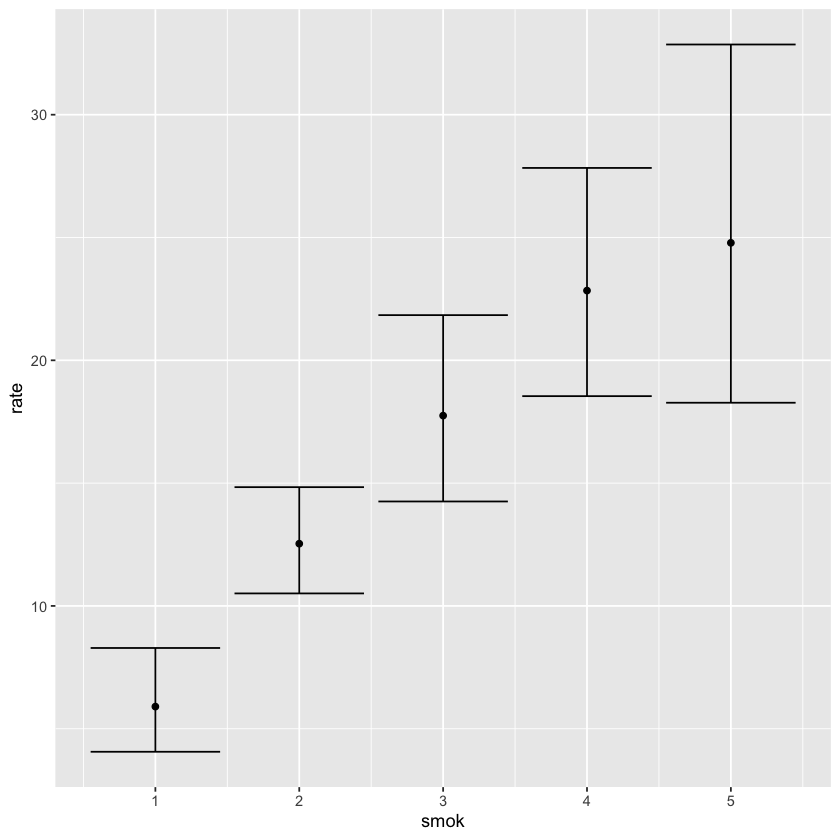

In [19]:
survRate(Surv(followup_time/1000, all) ~ smok, data=whitehall_df_3) %>%
    ggplot(aes(x = smok, y = rate)) +
    #Plot the points
    geom_point() +
    #Add in error bars
    geom_errorbar(aes(ymin=lower, ymax=upper))

## Calculation of rate ratios

In [20]:
#Get the rate for non-smokers
smok_0 <- survRate(Surv(followup_time/1000, all) ~ smok2, data=whitehall_df_3) %>%
    filter(smok2 == 0) %>%
    purrr::pluck("rate")

#Get the rate for smokers
smok_1 <- survRate(Surv(followup_time/1000, all) ~ smok2, data=whitehall_df_3) %>%
    filter(smok2 == 1) %>%
    purrr::pluck("rate")

#Get the ratio
smok_1 / smok_0

[1] 2.035819

This does not include 95% CIs like the equivalent STATA code

## Calculation of odds ratios

In [21]:
mwanza_df <- read_dta("Data_files-20211113/MWANZA.dta")

In [22]:
head(mwanza_df)

idno,comp,case,age1,ed,eth,rel,msta,bld,inj,skin,fsex,npa,pa1,usedc,ud,ark,srk
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
112041,1,0,2,3,1,2,3,1,1,1,2,1,1,1,1,2,4
114002,1,0,6,1,1,4,1,1,1,1,1,2,2,1,1,4,4
114006,1,1,4,3,3,3,1,1,5,2,2,3,2,2,1,3,3
114020,1,1,3,3,3,3,1,1,1,2,2,3,2,1,2,2,2
114025,1,1,1,3,1,3,1,1,2,2,1,1,2,1,1,2,4
121006,1,0,2,1,1,2,1,1,1,1,2,1,2,1,1,1,4


In [23]:
CrossTable(mwanza_df$case)


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  763 

 
          |         0 |         1 | 
          |-----------|-----------|
          |       574 |       189 | 
          |     0.752 |     0.248 | 
          |-----------|-----------|



 


In [24]:
CrossTable(mwanza_df$ed)


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  763 

 
          |         1 |         2 |         3 |         4 | 
          |-----------|-----------|-----------|-----------|
          |       312 |        75 |       365 |        11 | 
          |     0.409 |     0.098 |     0.478 |     0.014 | 
          |-----------|-----------|-----------|-----------|



 


In [25]:
CrossTable(mwanza_df$case, mwanza_df$ed, chisq=TRUE)

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  763 

 
               | mwanza_df$ed 
mwanza_df$case |         1 |         2 |         3 |         4 | Row Total | 
---------------|-----------|-----------|-----------|-----------|-----------|
             0 |       263 |        51 |       255 |         5 |       574 | 
               |     3.408 |     0.521 |     1.397 |     1.296 |           | 
               |     0.458 |     0.089 |     0.444 |     0.009 |     0.752 | 
               |     0.843 |     0.680 |     0.699 |     0.455 |           | 
               |     0.345 |     0.067 |     0.334 |     0.007 |           | 
---------------|-----------|-----------|-----------|-----------|-----------|
             1 |        49 |        24 |       110 |         6 |       189 | 
            

The `chisq=TRUE` option tests the null hypothesis that the two distributions of education level are the same.

#### Create a new variable ed2 which takes the value 1 for women with no formal education and value 2 for those with some education (codes 2-4 of ed).

In [26]:
mwanza_df <- mwanza_df %>%
    mutate(ed2 = case_when(ed == 1 ~ 1,
                           ed > 1 ~ 2))

To check that the new variable has been coded correctly, tabulate it against the original variable:

In [27]:
CrossTable(mwanza_df$ed, mwanza_df$ed2)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  763 

 
             | mwanza_df$ed2 
mwanza_df$ed |         1 |         2 | Row Total | 
-------------|-----------|-----------|-----------|
           1 |       312 |         0 |       312 | 
             |   266.581 |   184.419 |           | 
             |     1.000 |     0.000 |     0.409 | 
             |     1.000 |     0.000 |           | 
             |     0.409 |     0.000 |           | 
-------------|-----------|-----------|-----------|
           2 |         0 |        75 |        75 | 
             |    30.668 |    21.216 |           | 
             |     0.000 |     1.000 |     0.098 | 
             |     0.000 |     0.166 |           | 
             |     0.000 |     0.098 |           | 
-------------|-----------|-----------|-

To derive the odds ratio we use the `oddsratio.wald` command from package `epitools`:

In [28]:
library(epitools)


Attaching package: ‘epitools’


The following object is masked from ‘package:survival’:

    ratetable




In [29]:
table(mwanza_df$case, mwanza_df$ed2) %>%
    oddsratio.wald()

,1,2,Total
0,263,311,574
1,49,140,189
Total,312,451,763
,estimate,lower,upper
0,1.000000,NA,NA
1,2.416169,1.678287,3.478471
,midp.exact,fisher.exact,chi.square
0,NA,NA,NA
1,9.562924e-07,1.047735e-06,1.401274e-06


This shows that the odds of HIV infection in the educated women is 2.42 times that in the uneducated women, with 95% confidence interval 1.67 to 3.50.

It is important to take account of missing values when analysing data. The variable skin records skin incisions or tattoos (coded: 1=no, 2=yes, 9=missing).

To tabulate skin and obtain odds ratio estimates, type:

In [30]:
CrossTable(mwanza_df$skin)


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  763 

 
          |         1 |         2 |         9 | 
          |-----------|-----------|-----------|
          |       342 |       420 |         1 | 
          |     0.448 |     0.550 |     0.001 | 
          |-----------|-----------|-----------|



 


In [31]:
library(epiDisplay)

Loading required package: foreign

Loading required package: nnet


Attaching package: ‘epiDisplay’


The following object is masked from ‘package:gmodels’:

    ci


The following object is masked from ‘package:ggplot2’:

    alpha




In [44]:
table(factor(mwanza_df$case, levels = c(0,1)), factor(mwanza_df$skin, levels = c(1,2,9))) %>%
    oddsratio

Warning message in chisq.test(xx, correct = correction):
“Chi-squared approximation may be incorrect”


$data
       
          1   2 9 Total
  0     267 306 1   574
  1      75 114 0   189
  Total 342 420 1   763

$measure
   odds ratio with 95% C.I.
    estimate     lower    upper
  0 1.000000        NA       NA
  1 1.325062 0.9496391 1.856954

$p.value
   two-sided
    midp.exact fisher.exact chi.square
  0         NA           NA         NA
  1 0.09798945    0.2057879  0.2145191

$correction
[1] FALSE

attr(,"method")
[1] "median-unbiased estimate & mid-p exact CI"

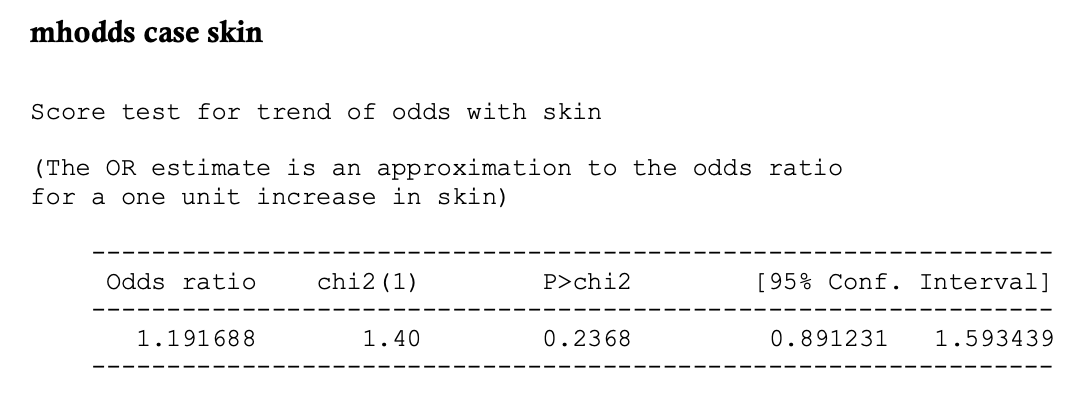

Gives different results than STATA, not sure why...

Now to omit 9

In [33]:
epi.2by2(table(factor(mwanza_df$case, levels = c(1,0)), 
               factor(mwanza_df$skin, levels = c(2,1))), 
         method = "case.control", digits=4)

             Outcome +    Outcome -      Total        Prevalence *        Odds
Exposed +          114           75        189                60.3        1.52
Exposed -          306          267        573                53.4        1.15
Total              420          342        762                55.1        1.23

Point estimates and 95% CIs:
-------------------------------------------------------------------
Odds ratio                                     1.3263 (0.9493, 1.8530)
Attrib fraction (est) in the exposed (%)      24.5727 (-6.6958, 46.8767)
Attrib fraction (est) in the population (%)   6.6774 (-1.1974, 13.9393)
-------------------------------------------------------------------
Uncorrected chi2 test that OR = 1: chi2(1) = 2.747 Pr>chi2 = 0.097
Fisher exact test that OR = 1: Pr>chi2 = 0.109
 Wald confidence limits
 CI: confidence interval
 * Outcomes per 100 population units 

# Review exercise (time for you to have a go... )

### 1) How many men in the dataset died of CHD?

In [34]:
whitehall_df_2 %>%
    filter(chd == 1) %>%
    nrow

[1] 154

154 deaths from CHD

### 2) What is the risk of death from CHD in each smoking category of smok2?

In [35]:
epi.2by2(table(factor(whitehall_df_2$smok2, levels = c(1,0)), 
               factor(whitehall_df_2$chd, levels = c(1,0))), 
         method = "cohort.count", digits=4)

             Outcome +    Outcome -      Total        Inc risk *        Odds
Exposed +           88          626        714             12.32      0.1406
Exposed -           66          897        963              6.85      0.0736
Total              154         1523       1677              9.18      0.1011

Point estimates and 95% CIs:
-------------------------------------------------------------------
Inc risk ratio                                 1.7983 (1.3268, 2.4375)
Odds ratio                                     1.9105 (1.3666, 2.6710)
Attrib risk in the exposed *                   5.4713 (2.5799, 8.3628)
Attrib fraction in the exposed (%)            44.3925 (24.6280, 58.9743)
Attrib risk in the population *                2.3295 (0.2183, 4.4406)
Attrib fraction in the population (%)         25.3672 (11.1514, 37.3084)
-------------------------------------------------------------------
Uncorrected chi2 test that OR = 1: chi2(1) = 14.717 Pr>chi2 = <0.001
Fisher exact test that OR =

Risk of 12.3% in smokers, 6.85% in non-smokers

### 3) What is the risk ratio of current smokers to non-smokers?

From looking at table in answer 2, risk ratio is 1.80

### 4) Use the stset command to define follow-up details for the outcome CHD

Not necessary in `R`

### 5) Use strate to obtain the CHD mortality rates for current smokers and non- smokers.

In [36]:
survRate(Surv(followup_time, chd) ~ smok2, data=whitehall_df_3)

,smok2,tstop,event,rate,lower,upper
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
smok2=0,0,16362.62,66,0.004033583,0.003119573,0.005131706
smok2=1,1,11242.75,88,0.007827269,0.006277698,0.009643414


0.004 per person-year in non-smokers, 0.008 per person-year in smokers

### 6) What is the rate of deaths due to CHD per 1000 person-years for current smokers and non-smokers?

In [37]:
survRate(Surv(followup_time/1000, chd) ~ smok2, data=whitehall_df_3)

,smok2,tstop,event,rate,lower,upper
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
smok2=0,0,16.36262,66,4.033583,3.119573,5.131706
smok2=1,1,11.24275,88,7.827269,6.277698,9.643414


4.034 per 1000 person-years in non-smokers, 7.827 per person-years in smokers

### 7) Use stmh to obtain the rate ratio of CHD death rates for smokers to non-smokers.

In [38]:
survRate(Surv(followup_time, chd) ~ smok2, data=whitehall_df_3) %>%
    dplyr::select(rate) %>%
    slice(2) %>%
    unlist /
survRate(Surv(followup_time, chd) ~ smok2, data=whitehall_df_3) %>%
    dplyr::select(rate) %>%
    slice(1) %>%
    unlist

rate 
1.940525

Rate ratio is 1.94

### 8) Read in the Mwanza data.

In [39]:
mwanza_df <- read_dta("Data_files-20211113/MWANZA.dta")

### 9) How many women had ever used a condom (the variable name for condom use is usedc)?

In [40]:
mwanza_df %>%
    filter(usedc == 2) %>%
    nrow

[1] 23

23 women have used a condom

### 10) What proportion of cases had ever used a condom?

In [41]:
mwanza_df %>%
    filter(case == 1) %>%
    group_by(usedc) %>%
    summarise(n = n()) %>%
    mutate(proportion = n / sum(n) * 100)

usedc,n,proportion
<dbl>,<int>,<dbl>
1,180,95.238095
2,7,3.703704
9,2,1.058201


3.70% of cases had used a condom

### 11) Use mhodds to obtain the odds ratio for condom use and HIV infection.

(Remember to account for the missing values for usedc)

In [43]:
epi.2by2(table(factor(mwanza_df$usedc, levels = c(2,1)), 
               factor(mwanza_df$case, levels = c(1,0))), 
         method = "case.control", digits=4)

             Outcome +    Outcome -      Total        Prevalence *        Odds
Exposed +            7           16         23                30.4       0.438
Exposed -          180          558        738                24.4       0.323
Total              187          574        761                24.6       0.326

Point estimates and 95% CIs:
-------------------------------------------------------------------
Odds ratio                                     1.3562 (0.5492, 3.3490)
Attrib fraction (est) in the exposed (%)      26.2356 (-115.5218, 71.8354)
Attrib fraction (est) in the population (%)   0.9833 (-2.1830, 4.0514)
-------------------------------------------------------------------
Uncorrected chi2 test that OR = 1: chi2(1) = 0.440 Pr>chi2 = 0.507
Fisher exact test that OR = 1: Pr>chi2 = 0.470
 Wald confidence limits
 CI: confidence interval
 * Outcomes per 100 population units 

Odds ratio of 1.356 